In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
hou = pd.read_csv('housing.csv')
hou.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [130]:
hou['median_house_value'].max()

500001.0

In [33]:
# the code helpd the get the datatype of each columns.

hou.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [34]:
# the info() method gives us the number of row, non-null counts in each attribute and data types of each attribute.
# not that the non-null numbers of 'total_bedrooms' attribute/feature is 20433 as against 20640. This means it has a missinng value of
# 207 which must be taken care off.

hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
# the 'ocean_proximity' attrinute is an oject which could be any pyhton object just like a text attribute as shown in the dataset.
# to get the various different cateogories in the feauture/attribute 'ocean_proximity', we will use the .value_counts() methods.

hou['ocean_proximity'].value_counts()

# this implies we have 4 different categories.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
# the next is to use the describe method to understand the summary of numerical attributes i.e columns containing numerical values.
# in this case, we use the .describe() method.

hou.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


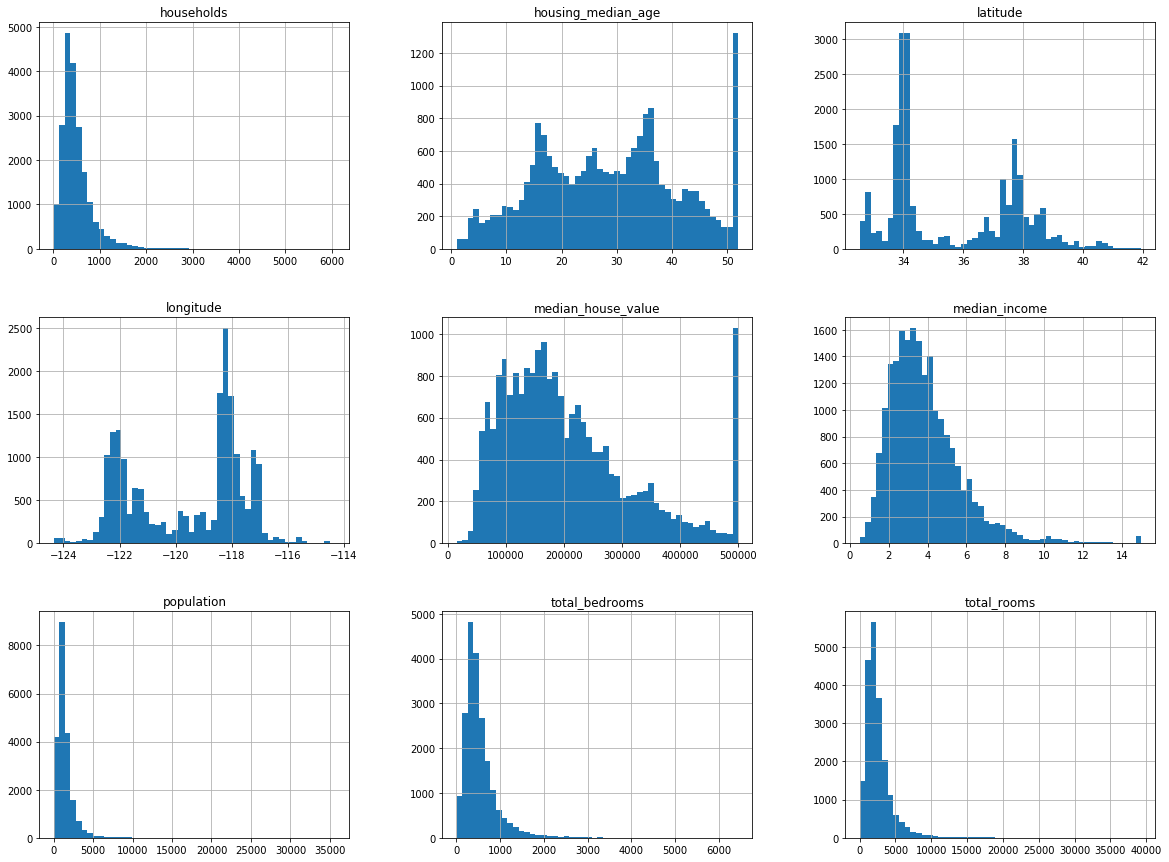

In [37]:
# plottign the histogram for the whole attributes with numerical values

hou.hist(bins=50, figsize=(20, 15))
plt.show()

In [38]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [39]:
train_set, test_set = split_train_test(hou, 0.2)

len(train_set)

16512

In [40]:
len(test_set)

4128

In [41]:
# instead of using the function above, we could as well use the Sklearn library to split the train and test set.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hou, test_size=0.2, random_state=42) 
# the above code implies that 20% of the dataset is used as the test size whole 80% is use for training.

In [42]:
train_set.shape

(16512, 10)

In [43]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [44]:
test_set.shape

(4128, 10)

In [45]:
# For example, if my client informs me that the 'median income' atribute contributes greatly to the median house prices,
# It is imprtant to look at the histogram to see the distribution of the income.
# from the 'median income' histogram above, the concentration of data is clustered between 1.5 to 6 ($15000 to $60000) with little above 6. 
# hence, it is important to catgorise the income into groups (labelled from 1 to 5).
# the pd.cut() creates another income categrogy attribute with 5 categories.


hou["income_cat"] = pd.cut(hou["median_income"],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1, 2, 3, 4, 5])

In [46]:
hou.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


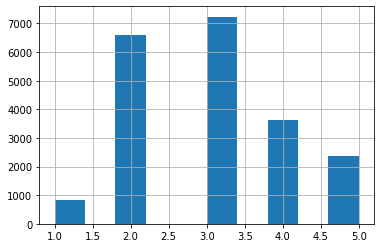

In [47]:
# to see the new grouping of the median income on histogram, we use the code below.

hou['income_cat'].hist()
plt.show()

In [48]:
# now we have to stratify the samples to avoid bias using sklearn

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hou, hou["income_cat"]): #stratified the whole of the data based on the coolumn "income_cat"
    strat_train_set = hou.loc[train_index] #the train_index calls out every index of train set while
    strat_test_set = hou.loc[test_index] #the test_index calls out every index of test set.


In [49]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [50]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4


In [51]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [52]:
#now we need to drop the 'income_cat' column in both strat_train_set and strat_test_set dataframe.

for cols in (strat_train_set, strat_test_set):
    cols.drop('income_cat', axis=1, inplace=True)

In [53]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [54]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


# Visualization to gain insight to the Data
#### Why we startify is to avoid bias. Now we have to visualiza to see the difference between the unstratified and stratified data.

In [55]:
# first is to get a copy of the stratified train set (strat_train_set) using the .copy() method

new_hou = strat_train_set.copy()

In [56]:
new_hou

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


# Visualization of the Geographical data

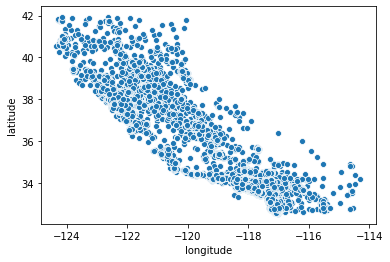

In [57]:
#using the seaborn library

sns.scatterplot(x='longitude', y='latitude', data=new_hou)
plt.show()

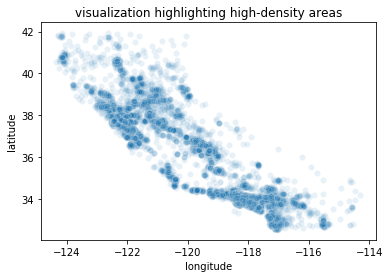

In [58]:
# this plot is similar to the one above. However, it reveals the concentrations of points or high density of data points.

sns.scatterplot(x='longitude', y='latitude', data=new_hou, alpha=0.1)
plt.title('visualization highlighting high-density areas')
plt.show()

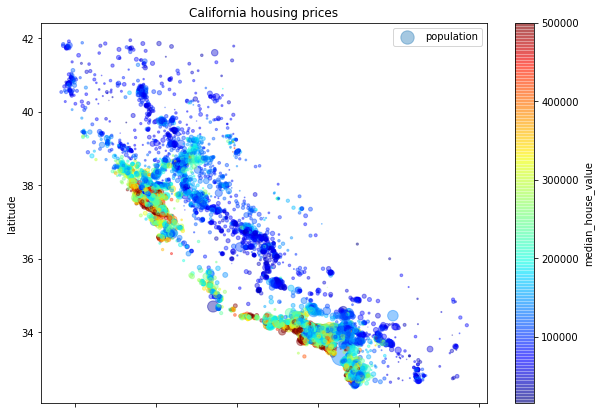

In [59]:
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We
# will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)


new_hou.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=new_hou["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
plt.title('California housing prices')
plt.show()

import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = new_hou.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=new_hou['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = new_hou["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Correlation Matrix of the Stratified Train Set (new_hou)

In [60]:
corr_mat = new_hou.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


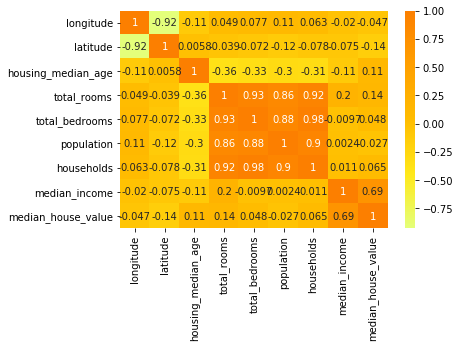

In [61]:
sns.heatmap(corr_mat, cmap='Wistia', annot = True)

In [62]:
# sorting out the correlation matrix with respect to median house value

corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

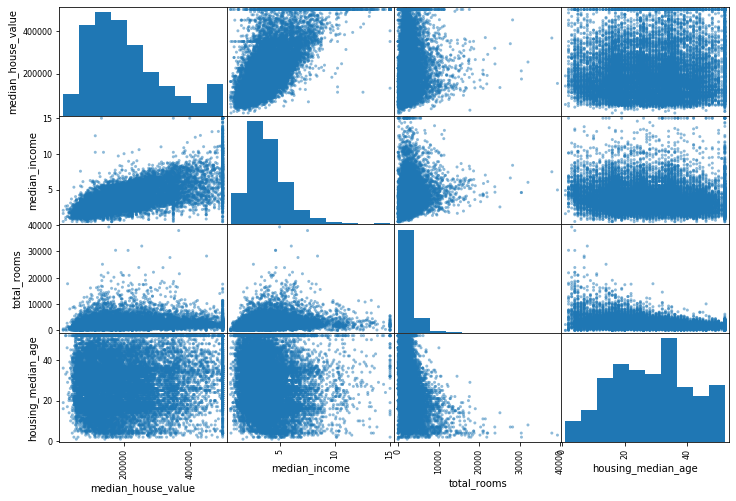

In [63]:
# the essense of scatter matrix is to see the correleation between attributes. Hence, it plots every numnerical trribute 
# against every other numerical attribute.

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(new_hou[attributes], figsize=(12, 8))

plt.show()

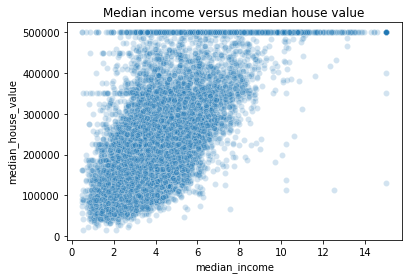

In [64]:
# from the scatter plots of the attributes above, the median_house_valu and median_income are strongly.
# the scatter plot is below.

sns.scatterplot(x='median_income', y='median_house_value', data = new_hou, alpha=0.2)
plt.title('Median income versus median house value')
plt.show()

In [65]:
# Exploring other various attributes/feature combinations for eample: rooms per household, bedrooms per rooms, population per household.
# this can be done by creating a column for the attributes in the dataframe new_hou.


new_hou['rooms_per_household'] = new_hou['total_rooms']/new_hou['households']
new_hou["bedrooms_per_room"] = new_hou["total_bedrooms"]/new_hou["total_rooms"]
new_hou["population_per_household"] = new_hou["population"]/new_hou["households"]

In [66]:
new_hou.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [67]:
corr_matt = new_hou.corr()

In [68]:
corr_matt['median_house_value'].sort_values(ascending=False)  #see page 92.

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## **Prepare the Data for Machine Learning Algortihms**

In [69]:
hou.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [70]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [71]:
new_hou.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


To clean the data, it is necessary to seperate the predictors form the labels as they won't undergo the same transformations.

In [72]:
housing = strat_train_set.drop('median_house_value', axis=1)

In [73]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [74]:
housing_labels = strat_train_set['median_house_value'].copy()
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

## **Data Cleaning**

### Emphasis on handling missing values

In [75]:
# we have 158 missing values in the housing dataframe.

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

three things can be done to the mising values.
1. housing.dropna(subset=['total_bedrooms'])
2. housing.drop('tota_bedrooms', axis=1)
3. median = housing['total_bedrooms'].median()
4. housing['total_bedrooms'].fillna(median, inplace=True)

However, Scikit-Learn provdes a simpler or handy way to address missing values using the "SimpleImputer". It can be used this way:

1. create a SimpleImputer instance showing that I want to replace each attributes' missing values with median of that attribute:

In [76]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [77]:
# from the housing dataframe above, the ocean_proximity must be dropped cos it is not a numerical attribute.

#however, a copy of the dropped attributed must be saved in a new dataframe cos it will be needed later.

housing_num = housing.drop('ocean_proximity', axis=1)

In [78]:
housing_num.head() #notice that the 'ocean_proximity' has been dropped in the new dataframe below.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [79]:
#next thing is to fit the imputer intsance to train data using the fit() method

In [80]:
# the imputer does compute the median of each attribute and then store the result in its statistics_intsnace variable. ALthough
#only total_bedrooms attribute has missing values, howver, we are not completely sure if other attribute has in the new data before it goea live.
# as a result, it is best and safe to apply the imputer to all the numerical attributes.

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [81]:
# the imputer.statistics_ does store the median for all attributes in the dataframe housing_num

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [82]:
# alternatively, we can use:

housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [83]:
# the next thing is to use the 'trained' imputer to transform the training set by replacing missing values by the learned medians:

X = imputer.transform(housing_num)

In [84]:
# the result X is a numpy array containing transformed features. and it easily can be put into a pandas data frame. 

X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [85]:
# to put X into a dataframe, use the below code but note that it is stored in the housing_tr dataframe

housing_tr = pd.DataFrame(X, columns=housing_num.columns) # columns=housing_num.columns means use the same column name as that of the housing number

In [86]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [87]:
# the code below shows that the missing values has been replced by the median.

housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## **Handling Text and Categorical Attributes**

This section will deal with how categorical attributes are being handled in any data set. Notice that "ocean_proximity" column/attribute contains text attribute. As a result, we cannot comput its median as done for other attributes above.

In [88]:
housing_cat = housing[['ocean_proximity']] #extract the 'ocean_proximity' column and store it in housing_cat
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


**1. OrdinalEncoder class**

Most ML prefers to workk with numbers. So it is important to convert these categories from text to numbers. In this case, the skikit-learn **OrdinalEncoder class** will be used.

In [89]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [90]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [91]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [92]:
# to get the caegories of the attribute "ocean_proximity", we use the "categories_instance" variable.
# It is a list containing a 1D array of categories for each categorical attribute (in this case, a list
# containing a single array since there is just one categorical attribute):

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The **demerit** or **issue** with the use of ****OrdinalEncoder class**** is that the ML algorithms will assume that two nearby or close values are more similar than two distant numbers/values. This method may be **great for ordered categories such as "bad", "average", "good", "excellent"**. However, theis method is not okay for the **ocean_proximity** column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. **Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors**.

**2. OneHotEncoder class**

In [93]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

In [94]:
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)

In [95]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

It is worth noting that the output above is a ***Scipy sparse matrix*** instead  of a ***Numpy array***. ***Scipy sparse matrix*** is very useful and important when we have ***categorical attributes with thousands of categories***. One the one-hot encoding has been executed, it outputs a matrix with thousands of columns and the matrix is full with ***zeros*** except for a single ***1*** per row.

**Note:** It will be wasteful to use tons of memory to store zeros. instead, a sparse matrix only stores the location of the non-zero elements. It can be use as a 2D array but it can also be converted to a dense Numpy array. All we need to do is to call the **toarray() method**.

In [96]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [97]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## **Custom Transformers**

In [98]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [99]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [100]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #tells you the respetcive column in the dataframe above

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # this class is used to combine new attributes to existing ones
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] #i.e total rooms/households
        population_per_household = X[:, population_ix] / X[:, households_ix] #i.e population / household
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] # i.e total bedrooms/total rooms
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [101]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

## **Feature Scaling**

The most important transformations one needs to apply to our data is ***feature scaling***. Most times, ***ML*** doesn't perform well when the input numerical atributes have very different scales. ***Example*** is the ***housing data***. The ***total number of rooms*** ranges from 6 to 39320 as seen below while ***median income*** ranges from 0 to 15

In [102]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [103]:
housing_tr['total_rooms'].min(), housing_tr['total_rooms'].max()

(6.0, 39320.0)

In [104]:
housing_tr['median_income'].min(), housing_tr['median_income'].max()

(0.4999, 15.0001)

There are two ways to get all attributes to have the same scale: **min-max scaling and standardization**

The **min-max scaling** also called **normalization** is simple. In this case, values are shifted and rescaled so they they end up and ranging **0 to 1**. This is done by subtracting the min value and dividing by the max minus the min. Fortunately, Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

**Standardization** is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. **Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)**. However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called **StandardScaler** for standardization.


**Note:** As with all the transformations, it is important to fit the scalers to
the training data only, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).

## **Transformation Pipelines**

Although there several transformation steps that beed to be executed in right order abov. However, Scikit-Learn provides the Pipeline class to help with such sequence of transformations. Here is a small pipeline for the numerical attributes:

In [105]:
housing_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
dtype: int64

In [106]:
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [107]:
housing_num_tr.shape

(16512, 11)

In [108]:
housing_num.shape

(16512, 8)

In [109]:
housing_num.head() # the number attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [110]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


The **ColumnTransform** helps to handle bot catgorical and numberical columns together unlike the previous methods which handle them seperately.

In [111]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # number attributes. i.e columns that has numbers
cat_attribs = ['ocean_proximity']

# full pipeline for total data transfromation is below:

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), #the num_attribute is set to be transformed based on the num_pipeline above
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [112]:
housing_prepared.shape

(16512, 16)

In [113]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

my observation is that the **housing_num_tr** which is the **num_attributes** has a **total transformed columns** of **11** while the **housing_prepared** which has a combination of the **num_attributes and categorical attributes** has **total transformed columns** of **16**. The additional is the transformation of the **OneHotEncoder()** of the **categorical attributes**.

Now it worth noting that our housing data has been finally prepared for Machine learning and it is stored in **housing_prepared**

# **Select and Train a Model**

Now that the problem has been framed, data explored, sanpled the training and a test set, wroe a transformation pipelines to clean up and prepare the data for ML algorithms automatically, it is now set to select and train a machine leanring model.

## **Training and Evaluating on the Training Set**

### **(1) Linear Regression:** This method model we will look through is the Linear Regression Model.

In [114]:
housing_labels #labels which is the median_income we are looking for as a label but tho on the training set

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [115]:
housing_labels.shape

(16512,)

In [116]:
housing_prepared # other columns in the dataset that are factors that contibutes to the label (median_income)

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [117]:
housing_prepared.shape

(16512, 16)

In [118]:
from sklearn.linear_model import LinearRegression #import the Linear regression model

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) 

#housing_prepared is the independent variables containing other factors that determines the median_income (dependent variable or labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Time to test run some few instances from the training sets. Let's go, it's getting interesting FAM!

In [119]:
some_data = housing.iloc[:5] # that is extract the first five rows of the housing dataframe

In [120]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [121]:
some_labels = housing_labels.iloc[:5]

In [122]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [123]:
some_data_prepared = full_pipeline.transform(some_data)

In [124]:
some_data_prepared.shape

(5, 16)

In [125]:
print ('predictions:', lin_reg.predict(some_data_prepared))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [126]:
print('labels:', list(some_labels))

labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


The regression model works but not accurate. For example, the first prediction was off by close to 40% ((286600-210644)/210644 = 36%).

Now let's measure this regression model's **root mean squared error (RMSE)** on the whole training set using the Scikit-Leanr's **mean_squared_error** function.

In [127]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

THe model  predicted above is a case of underfittimg the training data. That is te features do not provide sufficient information to make good predictions or probabl the model is not powerful enough. ***Note:*** The only way to fix the problem of underfitting is to select a more poserful model to feed the training algorithm with better feature or reduce the constraints on the model.

This model is not regularized, so this rules
out the last option. You could try to add more features (e.g., the log of the popula‐
tion), but first let’s try a more complex model to see how it does.

In [129]:
housing_labels.max()

500001.0

### **(2) Decision Tree:** This is a powerful model capable of finding complex nonlinear relationships in the data using the the **DecsionTreeRegressor**

In [133]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [135]:
housing_predictions_DT = tree_reg.predict(housing_prepared)
tree_mse_DT = mean_squared_error(housing_labels, housing_predictions_DT)
tree_rmse_DT = np.sqrt(tree_mse_DT)
tree_rmse_DT

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
**it is much more likely that the model has badly overfit the data**. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.

## **Better Evaluation Using Cross-Validation**